# Project 1


### Step 1. Import libraries

In [80]:
#pandas
import pandas
#numpy
import numpy
import collections
import matplotlib.pyplot as plt 
%matplotlib inline

### Step 2. Import dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable.

In [42]:
chipotle = pandas.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', '\t')

### Step 4. Check the first 15 rows

In [3]:
chipotle.head(15)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the shape of the dataset?

In [4]:
chipotle.shape

(4622, 5)

### Step 6. How many columns are in the dataset?

In [6]:
chipotle.shape[1]

5

### Step 7. Print the name of all the columns.

In [7]:
chipotle.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [8]:
chipotle.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Get the item_name of the most-ordered item? 

In [18]:
grouped = chipotle.groupby('item_name')
grouped_with_sum = grouped.sum()
item_orders = grouped_with_sum.sort_values(['quantity'], ascending=False)
item_orders.iloc[0].name

'Chicken Bowl'

### Step 10. For the most-ordered item, how many items were ordered?

In [24]:
item_orders.iloc[0].quantity

761

### Step 11. What was the most ordered item in the choice_description column?

In [25]:
grouped = chipotle.groupby('choice_description')
grouped_with_sum = grouped.sum()
item_orders = grouped_with_sum.sort_values(['quantity'], ascending=False)
item_orders.iloc[0].name

'[Diet Coke]'

### Step 12. How many items were orderd in total?

In [26]:
chipotle.quantity.sum()

4972

### Step 13. How many orders were made in all?

In [27]:
chipotle.order_id.nunique()

1834

### Step 14. How many different items are sold?

In [28]:
chipotle.item_name.nunique()

50

### Step 15. How many products cost more than $10.00?

In [65]:
# clean the item_price column and transform it in a float
prices = [float(value[1 : -1]) for value in chipotle.item_price]

# reassign the column with the cleaned prices
# chipotle.item_price = prices
print(chipotle.head())

# delete the duplicates in item_name and quantity
filtered = chipotle.drop_duplicates(['item_name','quantity'])
print(filtered.head())

# select only the products with quantity equals to 1
one_prod = filtered[filtered.quantity == 1]
one_prod.head()

one_prod[one_prod['item_price']>10].item_name.nunique()

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description  item_price  
0                                                NaN        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                                NaN        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1

12

### Step 16. What is the price of each item? 
###### print a data frame with only two columns item_name and item_price

In [62]:
one_prod[['item_name', 'item_price']].sort_values(by = "item_price", ascending = False).head(20)

,item_name,item_price
606,Steak Salad Bowl,11.89
1229,Barbacoa Salad Bowl,11.89
1132,Carnitas Salad Bowl,11.89
7,Steak Burrito,11.75
168,Barbacoa Crispy Tacos,11.75
39,Barbacoa Bowl,11.75
738,Veggie Soft Tacos,11.25
186,Veggie Salad Bowl,11.25
62,Veggie Bowl,11.25
57,Veggie Burrito,11.25


### Step 17. Sort by the name of the item

In [67]:
chipotle.sort_values(by='item_name')

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
3422,1373,1,6 Pack Soft Drink,[Coke],6.49
553,230,1,6 Pack Soft Drink,[Diet Coke],6.49
1916,774,1,6 Pack Soft Drink,[Diet Coke],6.49
1922,776,1,6 Pack Soft Drink,[Coke],6.49
1937,784,1,6 Pack Soft Drink,[Diet Coke],6.49


### Step 18. What was the quantity of the most expensive item ordered?

In [68]:
chipotle.sort_values(by = "item_price", ascending = False).head(1)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


### Step 19. Create a histogram of the top 5 items bought

                                         0
Chips and Fresh Tomato Salsa           110
Izze                                    20
Nantucket Nectar                        27
Chips and Tomatillo-Green Chili Salsa   31
Chicken Bowl                           726


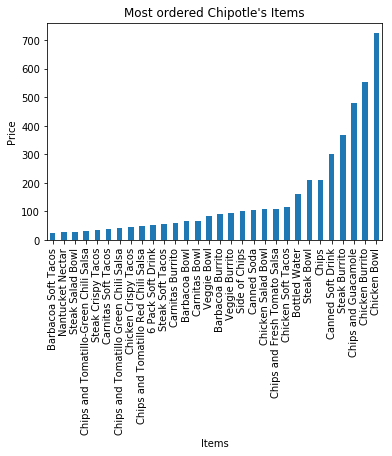

In [98]:
# import collections
# get the Series of the names
x = chipotle.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = collections.Counter(x)

# convert the dictionary to a DataFrame
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
print(df.head())
# sort the values from the top to the least value and slice the first 5 items
# df = df.sort_values(by=0,ascending = True)[20:50]
df = df[0].sort_values(ascending = True)[20:50]

# create the plot
# df.plot(kind='pie')
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

### Step 20. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70


(0, 36.71131197008484)

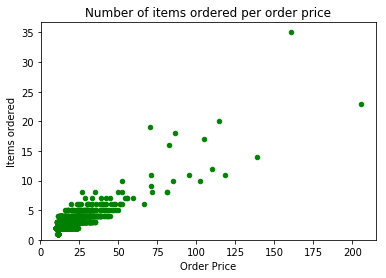

In [108]:

# groupby the orders and sum
orders = chipotle.groupby('order_id').sum()
print(orders.head())

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'orange')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 20, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)